# Sử dụng ggplot2 trong Python

### BS. Lê Ngọc Khả Nhi

Bài thực hành sau đây dành cho bạn mới chuyển từ R sang Python nhưng còn luyến tiếc phong cách đồ họa của thư viện ggplot2 và chưa quen với các thư viện như matplotlib hay seaborn. Tin vui, đó là chúng ta hoàn toàn có thể sử dụng các thư viện của R trong ngôn ngữ Python, bao gồm gpplot2, tuy phải vượt qua một số công đoạn kỹ thuật.

Đầu tiên, các bạn cần install package rpy2 : https://anaconda.org/r/rpy2

Package rpy2 cho phép import những thư viện của R như module Python, sau đó import và sử dụng tính năng của chúng trong ngôn ngữ Python, tương thích với những cấu trúc dữ liệu Python như pandas dataframe.

In [ ]:
 !conda install -c r rpy2 

## Install một R package

Ta chưa có package ggplot2 nên cần phải install nó từ CRAN, theo quy trình sau đây:

In [7]:
from rpy2.robjects.packages import importr

In [7]:
utils = importr('utils')
utils.install_packages('ggplot2')

Sau khi install xong, mình kiểm tra lại xem ggplot2 có sẵn sàng chưa ?

In [2]:
import rpy2.robjects.packages as rpackages
rpackages.isinstalled('ggplot2')

True

## Vẽ biểu đồ từ pandas dataframe

Nhi tải một file dữ liệu minh họa từ github vào một pandas dataframe object:

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kinokoberuji/R-Tutorials/master/aerodim.csv',
                sep = ';')

df.head()

,Poids,Taille,BMI,Age,Sexe,Hb,Diagnostic,GST,Volume,Surface,DmCO,Thickness,DLCO,FVC
0,53,165,19.467401,54,F,13.4,E,1.284048,7.0080,19.647869,450.315872,0.142701,6.767,2.30
1,92,170,31.833910,75,H,17.1,E,1.291861,3.7750,10.519710,72.271882,0.476060,19.146,3.04
2,69,186,19.944502,41,H,14.6,E,1.211214,7.7695,23.092705,372.142895,0.202952,29.047,5.72
3,60,160,23.437500,75,F,13.5,E,1.439790,4.3295,10.825326,89.206177,0.396893,14.943,2.57
4,72,172,24.337480,60,H,14.6,E,1.388885,5.5610,14.414152,180.833030,0.260699,13.888,4.36


Khi phân tích dữ liệu với Python, ta thường dùng 2 thư viện đồ họa matplotlib và seaborn, thí dụ sau đây ta vẽ một boxplot bằng seaborn:

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("husl")

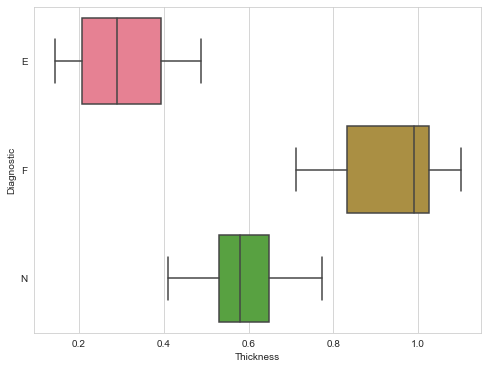

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, y = 'Diagnostic', x = 'Thickness', )

## Sử dụng ggplot2 trong Python

Bây giờ ta vào tiết mục chính, dùng ggplot2 để vẽ biểu đồ trong Python và so sánh với seaborn.

Trước hết, ta cần import ggplot2 từ rpy2, lúc này ggplot2 được xem như 1 module Python:

In [5]:
# Import ggplot2 package như 1 module Python

import rpy2.robjects.lib.ggplot2 as ggplot2

C:\Users\bacsi\Anaconda3\lib\site-packages\rpy2\robjects\lib\ggplot2.py:67: UserWarning: This was designed againt ggplot2 version 2.2.1 but you have 3.2.1
  warnings.warn('This was designed againt ggplot2 version %s but you have %s' % (TARGET_VERSION, ggplot2.__version__))


Nhưng ta vẫn chưa sẵn sàng để dùng cú pháp ggplot2, ta còn phải chuẩn bị 1 hàm sau đây để in biểu đồ xuất ra từ ggplot2 vào notebook và file ảnh PNG:

In [8]:
# Chuẩn bị graphic engine ggplot dùng cho Jupyter notebook

import uuid
from IPython.core.display import Image

grdevices = importr('grDevices')

def ggplot_notebook(gg, width = 600, height = 400, name = None):
    fn = name or '{uuid}.png'.format(uuid = uuid.uuid4())
    grdevices.png(fn, width = width, height = height)
    gg.plot()
    grdevices.dev_off()
    return Image(filename=fn)

Lưu ý rằng rpy2 không tương thích mặc định với pandas dataframe, ta cần dùng 1 method hoán chuyển từ pandas dataframe thành R dataframe

In [10]:
from rpy2.robjects import pandas2ri

pandas2ri.activate()

r_dataframe = pandas2ri.py2ri(df)

r_dataframe

Poids,Taille,BMI,...,Thickness,DLCO,FVC
53,165,19.467401,...,0.142701,6.767000,2.300000
92,170,31.833910,...,0.476060,19.146000,3.040000
69,186,19.944502,...,0.202952,29.047000,5.720000
60,160,23.437500,...,0.396893,14.943000,2.570000
...,...,...,...,...,...,...
62,171,21.203105,...,0.573280,30.560000,4.370000
65,190,18.005540,...,0.409640,29.050000,6.340000
87,185,25.420015,...,0.772808,28.680000,5.270000
67,176,21.629649,...,0.537985,5.277000,5.860000


Như vậy bước chuẩn bị đã hoàn tất, ta sẽ thử vẽ 1 boxplot:

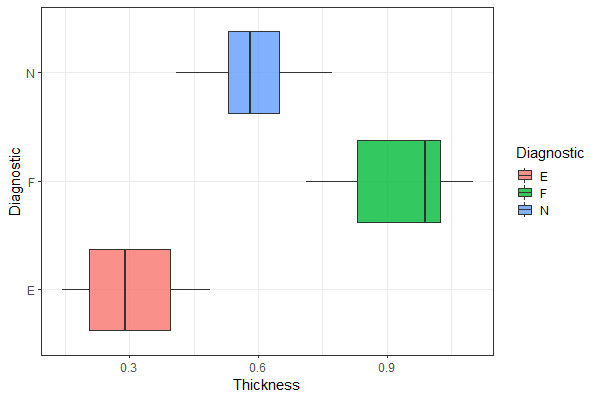

In [29]:
pp = ggplot2.ggplot(r_dataframe) + \
     ggplot2.aes_string(x='Diagnostic', y='Thickness', fill ='Diagnostic') + \
     ggplot2.geom_boxplot(alpha = 0.8) + \
     ggplot2.theme_bw(15) + \
     ggplot2.coord_flip()

ggplot_notebook(pp, name = "violin_1.png")

Đánh giá của Nhi: Phẩm chất boxplot của ggplot2 tốt hơn seaborn (hình sắc nét hơn, grid đẹp hơn, màu sắc mặc định trong sáng, tương phản tốt).

Tiếp theo, ta sẽ so sánh seaborn và ggplot2 khi vẽ 1D KDE plot:

Text(0, 0.5, 'Probability Density')

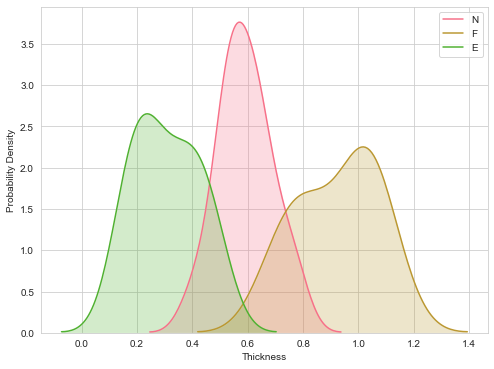

In [40]:
plt.figure(figsize=(8,6))

sns.kdeplot(df.loc[(df['Diagnostic']=='N'), 
            'Thickness'], shade=True, Label='N') 
  
sns.kdeplot(df.loc[(df['Diagnostic']=='F'), 
            'Thickness'], shade=True, Label='F') 

sns.kdeplot(df.loc[(df['Diagnostic']=='E'), 
            'Thickness'], shade=True, Label='E') 
  
plt.xlabel('Thickness') 
plt.ylabel('Probability Density')

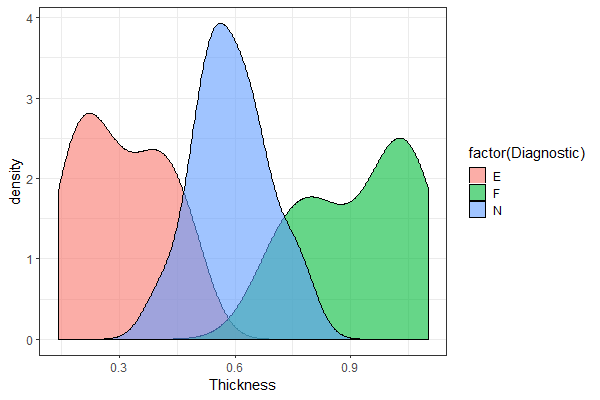

In [45]:
pp = ggplot2.ggplot(r_dataframe) + \
     ggplot2.aes_string(x='Thickness', fill ='factor(Diagnostic)') + \
     ggplot2.geom_density(alpha = 0.6) + \
     ggplot2.theme_bw(15)

ggplot_notebook(pp, name = "kde_1.png")

Nhận xét: Biểu đồ KDE plot của seaborn đẹp hơn so với ggplot2

Ta thử lần nữa với loại biểu đồ scatter plot và linear regression plot

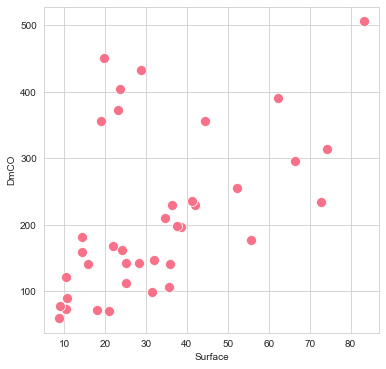

In [22]:
plt.figure(figsize=(6,6))

sns.scatterplot(data = df, x="Surface", y="DmCO", s = 100)

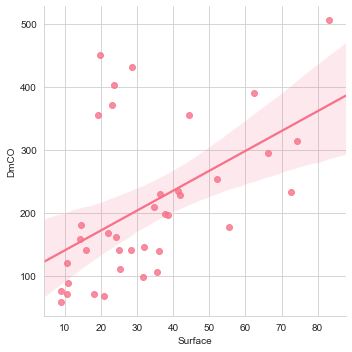

In [23]:
sns.lmplot(data = df, x="Surface", y="DmCO")

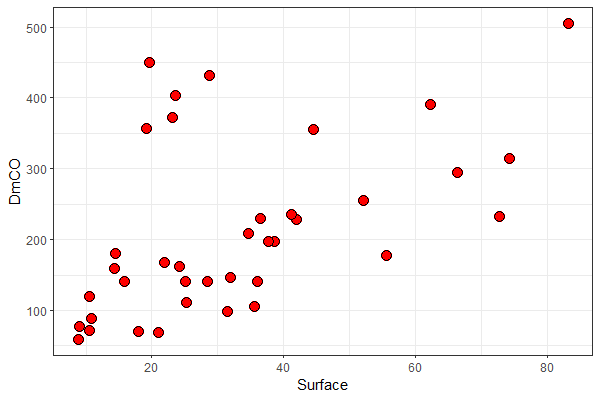

In [18]:
pp = ggplot2.ggplot(r_dataframe) + \
     ggplot2.aes_string(x='Surface', y = 'DmCO') + \
     ggplot2.geom_point(shape = 21, col = 'black', fill = 'red', size = 5) + \
     ggplot2.theme_bw(15)

ggplot_notebook(pp, name = "scatt_1.png")

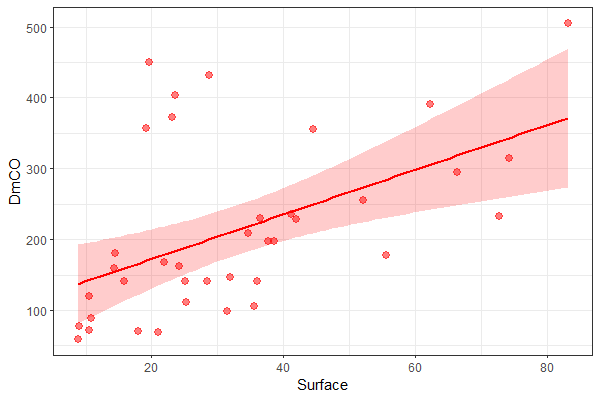

In [28]:
pp = ggplot2.ggplot(r_dataframe) + \
     ggplot2.aes_string(x='Surface', y = 'DmCO') + \
     ggplot2.geom_point(shape = 20, col = 'red', size = 5, alpha = 0.5) + \
     ggplot2.geom_smooth(method = 'lm', col = "red", fill = "red", alpha = 0.2) + \
     ggplot2.theme_bw(15)

ggplot_notebook(pp, name = "scatt_1.png")

Về hiệu quả mỹ thuật, không có nhiều khác biệt giữa ggplot2 và searborn (hay matplotlib), có thể biểu đồ scatterplot và linear regresion của seaborn chỉ đẹp hơn 1 chút. Tuy nhiên, có những thứ mà ggplot2 làm rất dễ dàng nhưng seaborn không thể làm được, thí dụ hiệu ứng "loess smoothing" :

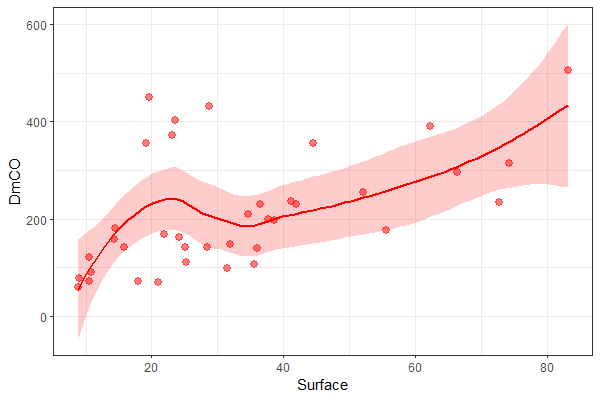

In [30]:
pp = ggplot2.ggplot(r_dataframe) + \
     ggplot2.aes_string(x='Surface', y = 'DmCO') + \
     ggplot2.geom_point(shape = 20, col = 'red', size = 5, alpha = 0.5) + \
     ggplot2.geom_smooth(col = "red", fill = "red", alpha = 0.2) + \
     ggplot2.theme_bw(15)

ggplot_notebook(pp, name = "scatt_2.png")

## Tóm tắt

Package rpy2 cho phép dùng song song 2 ngôn ngữ R và Python, thí dụ ta có thể vẽ biểu đồ bằng ggplot2 trong Python. 

Mỗi thư viện seaborn và ggplot2 đều có ưu, nhược điểm riêng. Thực ra đồ họa thống kê của Python có phẩm chất mỹ thuật tốt không thua kém, thậm chí cao hơn so với R. Tuy nhiên cú pháp ggplot2 dễ học hơn vì nó trong sáng hơn nhiều, thể hiện rất rõ lý thuyết về ngữ pháp đồ họa.

Chúc các bạn thực hành vui